# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly.express as px
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

In [5]:
type(project_data['project_is_approved'][0])

numpy.int64

In [6]:
fig = px.pie(project_data,labels='project_is_approved',names=project_data.project_is_approved,title='Project Acceptance rate')
fig.update_traces(textinfo='percent+value')
fig.update_layout(height=500, width=500,coloraxis_showscale=True)
fig.show()



Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


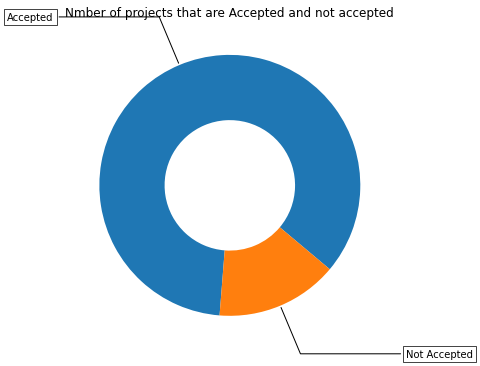

In [7]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [8]:
project_data.shape

(109248, 17)

In [9]:
pd.DataFrame(project_data.groupby('school_state')['project_is_approved'].agg(lambda x: x.eq(1).sum())).head()


project_is_approved
school_state                     
AK                            290
AL                           1506
AR                            872
AZ                           1800
CA                          13205

In [10]:
pd.DataFrame(project_data.groupby('school_state')['project_is_approved'].agg(total='count')).reset_index().head()

school_state  total
0           AK    345
1           AL   1762
2           AR   1049
3           AZ   2147
4           CA  15388

In [11]:
pd.DataFrame(project_data.groupby('school_state')['project_is_approved']).iloc[1].to_list()


['AL',
 23        1
 25        0
 59        1
 173       1
 290       1
          ..
 108698    1
 108943    1
 109009    1
 109089    1
 109150    1
 Name: project_is_approved, Length: 1762, dtype: int64]

In [12]:
#project_data.groupby('school_state')['project_is_approved'].apply(np.mean).reset_index()
#project_data.groupby('school_state')['project_is_approved'].agg(Avg='mean')
#project_data.groupby('school_state')['project_is_approved'].agg(total='count')


In [13]:

import plotly.graph_objects as go
import numpy as np
 


In [14]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [15]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [16]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [17]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    #temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    #temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    print(temp)
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

   school_state  project_is_approved
0            AK                  290
1            AL                 1506
2            AR                  872
3            AZ                 1800
4            CA                13205
5            CO                  935
6            CT                 1445
7            DC                  414
8            DE                  308
9            FL                 5144
10           GA                 3329
11           HI                  434
12           IA                  568
13           ID                  579
14           IL                 3710
15           IN                 2214
16           KS                  532
17           KY                 1126
18           LA                 1990
19           MA                 2055
20           MD                 1270
21           ME                  428
22           MI                 2672
23           MN                 1036
24           MO                 2202
25           MS                 1118
2

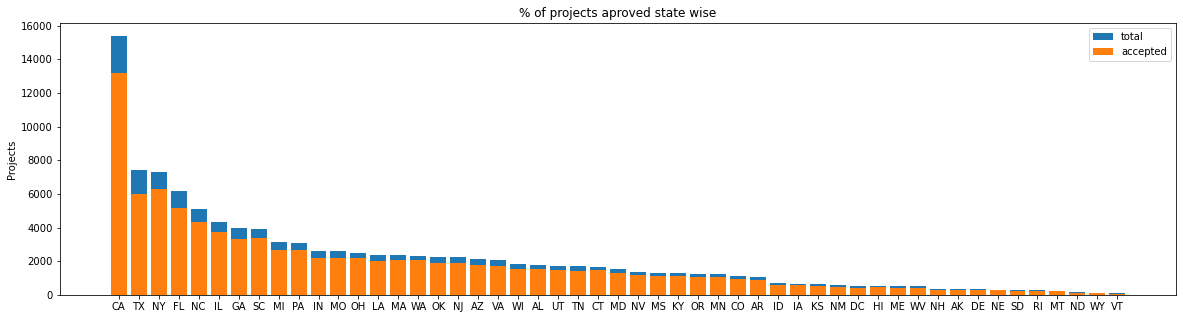

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [18]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

In [58]:
def univariate_analys(project_data,col1,col2,top):

    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    temp.sort_values(by=['total'],inplace=True, ascending=False)

    if top:
        temp = temp[0:top]
    # creating random data through randomint
    # function of numpy.random

    x = temp[col1]

    plot = go.Figure(data=[go.Bar(
        name = 'Accepted',
        x = x,
        y = temp[col2]

       ),
                           go.Bar(
        name = 'Not Accepted',
        x = x,
        y = temp['total']-temp[col2]
       )
    ])

    plot.update_layout(barmode='stack')

    plot.show()
    
    print(temp.sort_values(by=col2,ascending=False))
    
    

    print(col1+" with top Approval rates:",temp.sort_values(by=col2,ascending=False).head(5))
    print(col1+" with least Approval rates:",temp.sort_values(by=col2).head(5))



In [33]:
univariate_analys(project_data,'school_state','project_is_approved',top=False)

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
34           NY                 6291   7318  0.859661
43           TX                 6014   7396  0.813142
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
14           IL                 3710   4350  0.852874
40           SC                 3385   3936  0.860010
10           GA                 3329   3963  0.840020
22           MI                 2672   3161  0.845302
38           PA                 2658   3109  0.854937
15           IN                 2214   2620  0.845038
24           MO                 2202   2576  0.854814
35           OH                 2159   2467  0.875152
19           MA                 2055   2389  0.860193
47           WA                 2045   2334  0.876178
18           LA                 1990   2394  0.831245
36           OK                 1900   2276  0.834798
31           NJ             

In [34]:
univariate_analys(project_data, 'teacher_prefix', 'project_is_approved',top=False)

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
teacher_prefix with top Approval rates:   teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
teacher_prefix with least Approval rates:   teacher_prefix  project_is_approved  total       Avg
0            Dr.                    9     13  0.692308
4        Teacher                 1877   2360  0.795339
1            Mr.                 8960  10648  0.841473
3            Ms.                32860 

In [35]:
univariate_analys(project_data, 'project_grade_category', 'project_is_approved',top=False)

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
project_grade_category with top Approval rates:   project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
project_grade_category with least Approval rates:   project_grade_category  project_is_approved  total       Avg
2            Grades 9-12                 9183  10963  0.837636
1             Grades 6-8                14258  16923  0.842522
0             Grades 3-5                31729  37137  0.854377
3          Grades Pr

In [28]:
#univariate_analys(project_data, 'clean_categories', 'project_is_approved')

In [29]:
#univariate_analys(project_data, 'clean_subcategories', 'project_is_approved')

   school_state  project_is_approved
0            AK                  290
1            AL                 1506
2            AR                  872
3            AZ                 1800
4            CA                13205
5            CO                  935
6            CT                 1445
7            DC                  414
8            DE                  308
9            FL                 5144
10           GA                 3329
11           HI                  434
12           IA                  568
13           ID                  579
14           IL                 3710
15           IN                 2214
16           KS                  532
17           KY                 1126
18           LA                 1990
19           MA                 2055
20           MD                 1270
21           ME                  428
22           MI                 2672
23           MN                 1036
24           MO                 2202
25           MS                 1118
2

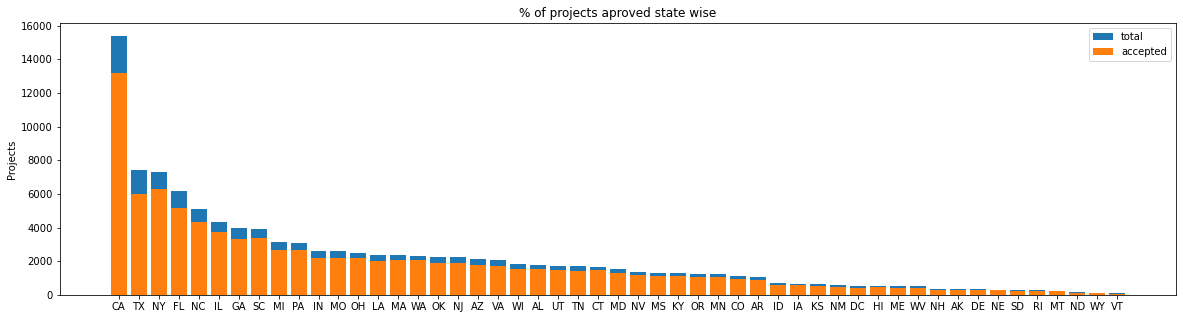

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [36]:
univariate_barplots(project_data, 'school_state', 'project_is_approved',top= False)

__Every state is having more than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

  teacher_prefix  project_is_approved
0            Dr.                    9
1            Mr.                 8960
2           Mrs.                48997
3            Ms.                32860
4        Teacher                 1877


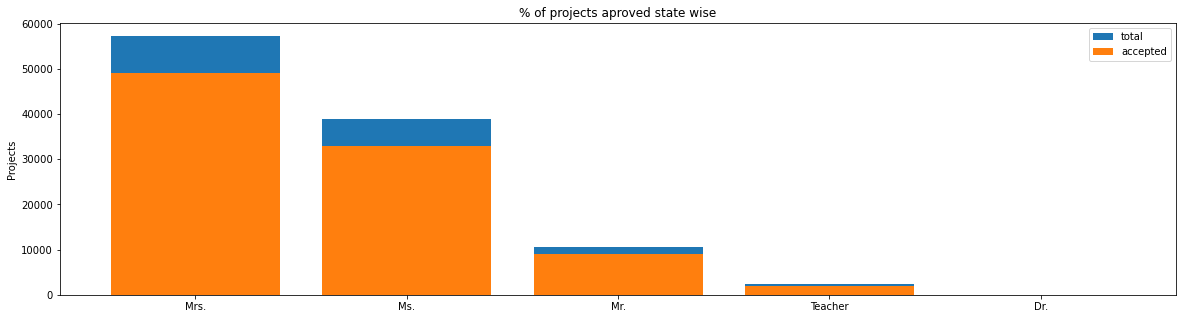

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [37]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

  project_grade_category  project_is_approved
0             Grades 3-5                31729
1             Grades 6-8                14258
2            Grades 9-12                 9183
3          Grades PreK-2                37536


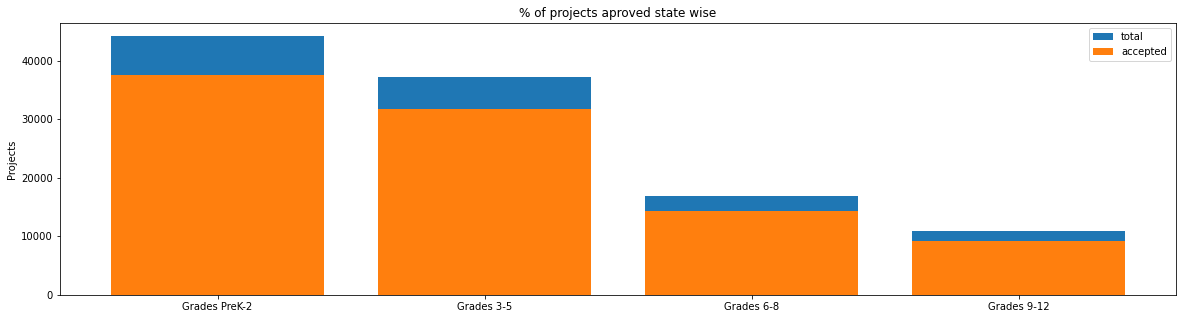

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [38]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [39]:
project_data['project_subject_categories'].to_list()

['Literacy & Language',
 'History & Civics, Health & Sports',
 'Health & Sports',
 'Literacy & Language, Math & Science',
 'Math & Science',
 'Literacy & Language, Special Needs',
 'Literacy & Language, Special Needs',
 'Math & Science',
 'Health & Sports',
 'Literacy & Language',
 'Literacy & Language',
 'Literacy & Language, Applied Learning',
 'Math & Science',
 'Special Needs',
 'Literacy & Language',
 'Health & Sports',
 'Literacy & Language, Special Needs',
 'Math & Science, Literacy & Language',
 'Applied Learning',
 'Health & Sports',
 'Literacy & Language',
 'Math & Science, Special Needs',
 'Literacy & Language',
 'Music & The Arts',
 'Math & Science',
 'Math & Science',
 'Literacy & Language, Math & Science',
 'Literacy & Language, Math & Science',
 'Literacy & Language, Special Needs',
 'Literacy & Language, Applied Learning',
 'Literacy & Language',
 'Special Needs',
 'Math & Science, Literacy & Language',
 'History & Civics',
 'Literacy & Language',
 'Health & Sports',
 '

In [40]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [41]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

In [42]:
project_data['clean_categories'].to_list()

['Literacy_Language',
 'History_Civics Health_Sports',
 'Health_Sports',
 'Literacy_Language Math_Science',
 'Math_Science',
 'Literacy_Language SpecialNeeds',
 'Literacy_Language SpecialNeeds',
 'Math_Science',
 'Health_Sports',
 'Literacy_Language',
 'Literacy_Language',
 'Literacy_Language AppliedLearning',
 'Math_Science',
 'SpecialNeeds',
 'Literacy_Language',
 'Health_Sports',
 'Literacy_Language SpecialNeeds',
 'Math_Science Literacy_Language',
 'AppliedLearning',
 'Health_Sports',
 'Literacy_Language',
 'Math_Science SpecialNeeds',
 'Literacy_Language',
 'Music_Arts',
 'Math_Science',
 'Math_Science',
 'Literacy_Language Math_Science',
 'Literacy_Language Math_Science',
 'Literacy_Language SpecialNeeds',
 'Literacy_Language AppliedLearning',
 'Literacy_Language',
 'SpecialNeeds',
 'Math_Science Literacy_Language',
 'History_Civics',
 'Literacy_Language',
 'Health_Sports',
 'Literacy_Language Math_Science',
 'Health_Sports Literacy_Language',
 'Health_Sports',
 'Literacy_Languag

                        clean_categories  project_is_approved
0                        AppliedLearning                 3072
1          AppliedLearning Health_Sports                  501
2         AppliedLearning History_Civics                  146
3      AppliedLearning Literacy_Language                 1887
4           AppliedLearning Math_Science                  855
5             AppliedLearning Music_Arts                  612
6           AppliedLearning SpecialNeeds                 1195
7     AppliedLearning Warmth Care_Hunger                    8
8                          Health_Sports                 8640
9          Health_Sports AppliedLearning                  163
10          Health_Sports History_Civics                   38
11       Health_Sports Literacy_Language                  679
12            Health_Sports Math_Science                  223
13              Health_Sports Music_Arts                  125
14            Health_Sports SpecialNeeds                 1215
15      

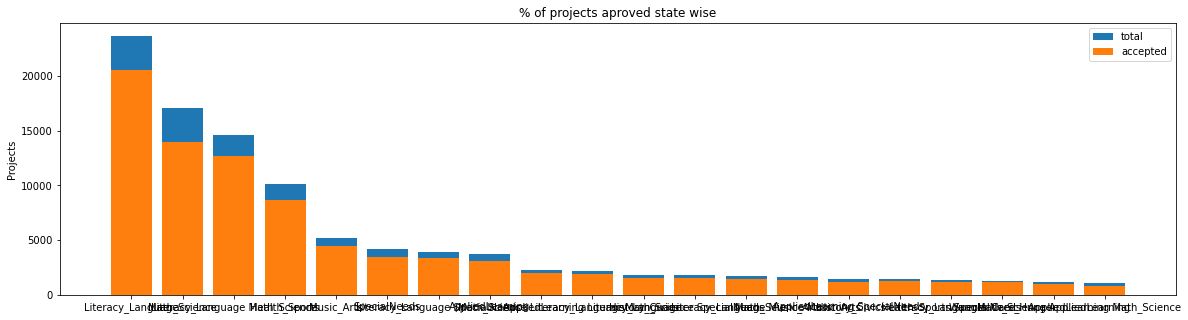

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [43]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [45]:
univariate_analys(project_data, 'clean_categories', 'project_is_approved',top=False)

                        clean_categories  project_is_approved  total       Avg
24                     Literacy_Language                20520  23655  0.867470
32                          Math_Science                13991  17072  0.819529
28        Literacy_Language Math_Science                12725  14636  0.869432
8                          Health_Sports                 8640  10177  0.848973
40                            Music_Arts                 4429   5180  0.855019
46                          SpecialNeeds                 3431   4226  0.811879
30        Literacy_Language SpecialNeeds                 3389   3961  0.855592
0                        AppliedLearning                 3072   3771  0.814638
36        Math_Science Literacy_Language                 1968   2289  0.859764
3      AppliedLearning Literacy_Language                 1887   2191  0.861251
16                        History_Civics                 1545   1851  0.834684
38             Math_Science SpecialNeeds            

In [46]:

for word in project_data['clean_categories'].values:
       print(word.split())

['Literacy_Language']
['History_Civics', 'Health_Sports']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'AppliedLearning']
['Math_Science']
['SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Math_Science', 'Literacy_Language']
['AppliedLearning']
['Health_Sports']
['Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'AppliedLearning']
['Literacy_Language']
['SpecialNeeds']
['Math_Science', 'Literacy_Language']
['History_Civics']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'Literacy_La

['Literacy_Language']
['Health_Sports', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Music_Arts']
['Music_Arts']
['Health_Sports']
['SpecialNeeds']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['History_Civics']
['Literacy_Language']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Math_Science']
['AppliedLearning']
['History_Civics', 'Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['AppliedLearning', 'SpecialNeeds']
['SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Health_Sports']
['Applie

['Literacy_Language']
['Health_Sports', 'Literacy_Language']
['Math_Science', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'Warmth', 'Care_Hunger']
['Literacy_Language']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Math_Science']
['SpecialNeeds']
['Music_Arts']
['Math_Science']
['Literacy_Language', 'History_Civics']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['AppliedLearning', 'Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Music_Arts']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Music_Arts']
['Liter

['AppliedLearning']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'History_Civics']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['SpecialNeeds']
['Warmth', 'Care_Hunger']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['History_Civics']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['AppliedLearning']
['Math_Science']
['Literacy_Language', 'History_Civics']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['SpecialNeeds']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['AppliedLearning']
['Health_S

['Literacy_Language']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['AppliedLearning']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['AppliedLearning']
['History_Civics', 'Literacy_Language']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['

['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Music_Arts']
['AppliedLearning', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['History_Civics']
['AppliedLearning']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'History_Civics']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['AppliedLearning']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'Health_Sports']
['AppliedLearning']
['Math_Science']
['AppliedLearning']
['Music_Arts']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['Health

['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['History_Civics', 'Literacy_Language']
['Math_Science']
['Health_Sports', 'AppliedLearning']
['Math_Science']
['Math_Science', 'History_Civics']
['Math_Science']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'AppliedLearning']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['History_Civics', 'Health_Sports']
['Health_Sports', 'Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['AppliedLearning', 'Music_Arts']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'SpecialNeeds']
['Health_Sports']
['Health_Sports']
['Literacy_Language']
['Math_Scien

['Literacy_Language']
['Music_Arts', 'Health_Sports']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['Math_Science', 'Literacy_Language']
['AppliedLearning', 'Math_Science']
['Music_Arts']
['Health_Sports']
['Health_Sports']
['Math_Science']
['Health_Sports', 'AppliedLearning']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['History_Civics']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['SpecialNeeds']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Health_Sports

['Math_Science']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['AppliedLearning']
['Literacy_Language']
['Math_Science']
['Math_Science']
['Health_Sports']
['Math_Science', 'History_Civics']
['Health_Sports', 'AppliedLearning']
['Music_Arts']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Health_Sports']
['Health_Sports']
['Math_Science', 'Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Math_Science']
['AppliedLearning', 'Math_Science']
['Math_Science']
['Li

['Health_Sports']
['AppliedLearning', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Health_Sports']
['History_Civics']
['Math_Science']
['History_Civics', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['Health_Sports']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'Health_Sports']
['Literacy_Language']
['AppliedLearning', 'Math_Science']
['Music_Arts']
['Math_Science', 'Music_Arts']
['AppliedLearning']
['Math_Science']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['AppliedLearning', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Math_Science', 'AppliedLearning']
['Health_Sports']
['Warmth', 'Care_Hunger']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_L

['Health_Sports']
['SpecialNeeds']
['Health_Sports']
['Music_Arts']
['Health_Sports', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science']
['Health_Sports']
['Math_Science', 'History_Civics']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Health_Sports', 'Literacy_Language']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['SpecialNeeds']
['Math_Science', 'Music_Arts']
['SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['Music_Arts']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'Literacy_Languag

['Health_Sports']
['AppliedLearning', 'Music_Arts']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning']
['AppliedLearning']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['SpecialNeeds']
['Math_Science']
['Math_Science']
['Health_Sports', 'SpecialNeeds']
['Health_Sports']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['History_Civics']
['Math_Science']
['Math_Science', 'Music_Arts']
['AppliedLearning']
['Health_Sports', 'Music_Arts']
['Math_Science']
['Math_Science']
['Math_Science']
['Math_Science']
['Math_Science']
['SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science']
['History_Civics', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Applied

['Literacy_Language']
['Math_Science']
['AppliedLearning']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'History_Civics']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Math_Science']
['AppliedLearning']
['Math_Science', 'History_Civics']
['Math_Science', 'AppliedLearning']
['AppliedLearning', 'Music_Arts']
['Music_Arts']
['AppliedLearning', 'Health_Sports']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Music_A

['Math_Science', 'Music_Arts']
['History_Civics']
['SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['SpecialNeeds', 'Music_Arts']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['Math_Science', 'AppliedLearning']
['SpecialNeeds']
['Math_Science']
['Music_Arts']
['Math_Science']
['AppliedLearning', 'History_Civics']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'Literacy_Language']
['Literacy_Lan

['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Health_Sports']
['Music_Arts']
['Music_Arts']
['Literacy_Language']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['AppliedLearning']
['Math_Science']
['Warmth', 'Care_Hunger']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Health_Sports']
['Music_Arts']
['Music_Arts']
['Health_Sports']
['SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['History_Civics', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'History_Civics']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Lite

['Literacy_Language']
['Health_Sports']
['Music_Arts']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['AppliedLearning', 'Health_Sports']
['AppliedLearning']
['AppliedLearning']
['AppliedLearning', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['AppliedLearning']
['Math_Science']
['Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['AppliedLearning', 'Math_Science']
['Math_Science']
['AppliedLearning']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['AppliedLearning']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'History_Civics']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Health_S

['Literacy_Language']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Math_Science', 'AppliedLearning']
['Health_Sports', 'SpecialNeeds']
['Health_Sports']
['Math_Science', 'SpecialNeeds']
['Health_Sports']
['History_Civics']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['History_Civics']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['AppliedLearning']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['History_Civics']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Literacy_La

['History_Civics', 'Literacy_Language']
['SpecialNeeds']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Literacy_Language']
['Music_Arts']
['Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Warmth', 'Care_Hunger']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Literacy_Language', 'Math_Science']
['Math_Science', 'History_Civics']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Math_Scienc

['AppliedLearning', 'Literacy_Language']
['Health_Sports']
['AppliedLearning']
['SpecialNeeds']
['History_Civics', 'SpecialNeeds']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['SpecialNeeds', 'Health_Sports']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['Music_Arts']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['History_Civics']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['SpecialNeeds']
['Health_Sports']
['Music_Arts']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Heal

['Music_Arts']
['Music_Arts']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Math_Science']
['Health_Sports']
['Music_Arts']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Music_Arts']
['History_Civics', 'Music_Arts']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['AppliedLearning', 'Health_Sports']
['SpecialNeeds']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Music_Arts']
['Literacy_La

['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['History_Civics']
['History_Civics', 'SpecialNeeds']
['Warmth', 'Care_Hunger']
['Math_Science', 'AppliedLearning']
['Health_Sports']
['Literacy_Language', 'History_Civics']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Music_Arts']
['Math_Science']
['Health_Sports']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Math_Science', 'Music_Arts']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Math_Science']
['Warmth', 'Care_Hunger']
['SpecialNeeds']
['History_Civics', 'Literacy_Language']
['Math_Science']
['AppliedLearning']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Health_Sports', 'Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Health_Sports']
['AppliedLearning']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Liter

['Literacy_Language']
['Health_Sports']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Math_Science']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['Health_Sports']
['Math_Science', 'Music_Arts']
['AppliedLearning', 'Music_Arts']
['AppliedLearning', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['SpecialNeeds']
['Math_Science', 'Literacy_Language']
['Health_Sports']
['Health_Sports']
['Literacy_Language']
['AppliedLearning']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['History_Civics', 'SpecialNeeds']
['Health_Sports']
['AppliedLearning', 'Music_Arts']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Literacy_Language']
['Math_Science'

['Literacy_Language']
['SpecialNeeds']
['History_Civics']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Music_Arts']
['SpecialNeeds']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['SpecialNeeds', 'Music_Arts']
['Health_Sports']
['Math_Science']
['AppliedLearning', 'Music_Arts']
['AppliedLearning']
['SpecialNeeds']
['Health_Sports']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Health_Sports', 'History_Civics']
['Health_Sports']
['Math_Science']
['Math_Science', 'Music_Arts']
['SpecialNeeds']
['Literacy_Language']
['Healt

['Math_Science', 'Music_Arts']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'History_Civics']
['Health_Sports']
['Health_Sports']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['AppliedLearning']
['History_Civics', 'Literacy_Language']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'History_Civics']
['Health_Sports']
['Literacy_Language']
['Health_Sports']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science', 'History_Civics']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Health_Sports']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_S

['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['History_Civics']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'AppliedLearning']
['Warmth', 'Care_Hunger']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['SpecialNeeds', 'Health_Sports']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Music_Arts']
['Math_Science']
['Math_Science', 'Music_Arts']
['Math_Science', 'AppliedL

['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'AppliedLearning']
['Literacy_Language']
['AppliedLearning', 'Math_Science']
['History_Civics']
['History_Civics']
['Math_Science']
['AppliedLearning']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'History_Civics']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Math_Science', 'SpecialNeeds']
['History_Civics', 'Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['

['Math_Science', 'AppliedLearning']
['Math_Science']
['Math_Science', 'History_Civics']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['AppliedLearning']
['Health_Sports']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Math_Science', 'Literacy_Language']
['Math_Science', 'Music_Arts']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'History_Civics']
['Literacy_Language', 'History_Civics']
['Math_Science', 'Literacy_Language']
['Health_Sports']
['Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['Lit

['Health_Sports']
['Math_Science']
['Warmth', 'Care_Hunger']
['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'Math_Science']
['History_Civics']
['AppliedLearning']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['AppliedLearning']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Music_Arts']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Music_Arts']
['AppliedLearning', 'Health_Sports']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_La

['Math_Science']
['Health_Sports']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['History_Civics']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['History_Civics', 'Literacy_Language']
['SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Warmth', 'Care_Hunger']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Music_Arts']
['Math_Science']
['Health_Sports']
['SpecialNeeds']
['AppliedL

['Literacy_Language']
['AppliedLearning']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Music_Arts']
['Math_Science', 'History_Civics']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Music_Arts']
['Math_Science']
['History_Civics', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['History_Civics']
['Health_Sports', 'SpecialNeeds']
['Health_Sports']
['AppliedLearning']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Litera

['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Health_Sports']
['Math_Science', 'Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'SpecialNeeds']
['Math_Science']
['Math_Science', 'Music_Arts']
['Math_Science']
['Literacy_Language', 'AppliedLearning']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['History_Civics']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['SpecialNeeds', 'Music_Arts']
['Music_Arts']
['Math_Science']
['Math_Science']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'SpecialNeeds']
['Literacy_Language', 'History_Civics']
['Literacy_Language']
['History_Civics', 'Literacy_La

['Music_Arts']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['History_Civics']
['AppliedLearning']
['Music_Arts']
['Math_Science']
['AppliedLearning']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['AppliedLearning']
['Music_Arts']
['AppliedLearning', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Health_Sports', 'Literacy_Language']
['Math_Science', 'History_Civics']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'History_Civics']
['Health_Sports']
['Literacy_Language']
['SpecialNeeds']
['Math_Science']
['Math_Science', 'Health_Sports']
['Music_Arts']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['Health_Sports']
['AppliedLearning', 'Math_Science']
['Lite

['Math_Science']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Warmth', 'Care_Hunger']
['Music_Arts']
['Health_Sports', 'Literacy_Language']
['Math_Science']
['AppliedLearning', 'Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['AppliedLearning']
['Math_Science']
['AppliedLearning']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'SpecialNeeds']
['Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning']
['Math_Science', 'Music_Arts']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['History_Civics', 'Literacy_Language']

['Literacy_Language', 'SpecialNeeds']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science', 'SpecialNeeds']
['Health_Sports']
['Math_Science']
['Health_Sports', 'SpecialNeeds']
['SpecialNeeds']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'Literacy_Language']
['Math_Science', 'AppliedLearning']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['AppliedLearning']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNe

['AppliedLearning']
['Math_Science']
['Music_Arts']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Music_Arts']
['Health_Sports']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['History_Civics', 'Literacy_Language']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['SpecialNeeds', 'Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Math_Science', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Music_Arts', 'SpecialNeeds']
['Warmth', 'Care_Hunger']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['SpecialNeeds']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['Music_Arts']
['Health_Sports']
['Math_Science

['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Music_Arts']
['SpecialNeeds']
['Literacy_Language']
['SpecialNeeds']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Math_Science']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['AppliedLearning']
['Math_Science']
['Math_Scie

['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Music_Arts']
['History_Civics', 'Math_Science']
['Math_Science']
['Math_Science']
['Health_Sports']
['AppliedLearning']
['Math_Science']
['Math_Science']
['Music_Arts']
['Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science']
['AppliedLearning', 'Math_Science']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Health_Sports']
['Health_Sports']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Music_Arts']
['Math_Science', 'Music_Arts']
['Math_Science', 'Liter

['Math_Science', 'SpecialNeeds']
['Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Music_Arts']
['Literacy_Language']
['AppliedLearning']
['Health_Sports']
['Literacy_Language']
['Math_Science', 'Health_Sports']
['SpecialNeeds']
['Literacy_Language']
['Math_Science', 'Health_Sports']
['Health_Sports']
['Health_Sports']
['Math_Science']
['Math_Science']
['Literacy_Language']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Math_Science']
['History_Civics', 'Music_Arts']
['SpecialNeeds']
['Math_Science', 'AppliedLearning']
['Literacy_Language', 'History_Civics']
['Health_Sports']
['Literacy_L

['Math_Science', 'AppliedLearning']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['AppliedLearning']
['Literacy_Language']
['AppliedLearning']
['Health_Sports']
['Health_Sports']
['Music_Arts']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['AppliedLearning']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['SpecialNeeds']
['Math_Science']
['AppliedLearning']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Warmth', 'Care_Hunger']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Music_Arts']
['Math

['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Health_Sports']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['History_Civics']
['Math_Science', 'Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Literacy_Language

['AppliedLearning', 'Health_Sports']
['Warmth', 'Care_Hunger']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['History_Civics']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['SpecialNeeds']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['AppliedLearning']
['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'Literacy_Language']
['SpecialNeeds']
['Math_

['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Math_Science', 'Music_Arts']
['AppliedLearning', 'Literacy_Language']
['AppliedLearning']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'History_Civics']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Music_Arts']
['Music_Arts']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Math_Science', 'History_Civics

['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science']
['SpecialNeeds']
['Music_Arts']
['Math_Science']
['Music_Arts']
['Math_Science']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Music_Arts']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science']
['

['Math_Science']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Math_Science']
['Literacy_Language', 'AppliedLearning']
['AppliedLearning', 'SpecialNeeds']
['Music_Arts']
['Math_Science']
['Health_Sports']
['Music_Arts']
['Literacy_Language', 'Music_Arts']
['Music_Arts']
['Math_Science']
['AppliedLearning']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science', 'Music_Arts']
['Music_Arts']
['Math_Science']
['Math_Science']
['Health_Sports']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Langu

['Literacy_Language', 'SpecialNeeds']
['History_Civics', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['AppliedLearning']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'AppliedLearning']
['Music_Arts']
['Math_Science']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Math_Science']
['Health_Sports', 'Math_Science']
['History_Civics', 'Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy

['History_Civics', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['AppliedLearning', 'Literacy_Language']
['Math_Science']
['Health_Sports', 'Literacy_Language']
['Health_Sports']
['Health_Sports']
['Music_Arts']
['Math_Science']
['Music_Arts']
['Health_Sports']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['SpecialNeeds']
['Literacy_Language', 'History_Civics']
['Literacy_Language']
['Health_Sports']
['Music_Arts']
['AppliedLearning']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'AppliedLearning']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
[

['Music_Arts']
['Literacy_Language']
['AppliedLearning']
['History_Civics']
['Literacy_Language']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Music_Arts']
['Health_Sports']
['Health_Sports', 'Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['History_Civics']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['AppliedLearning']
['SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['L

['Math_Science', 'AppliedLearning']
['Math_Science']
['Music_Arts']
['Health_Sports']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'SpecialNeeds']
['SpecialNeeds']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['AppliedLearning', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['SpecialNeeds']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Math_Science', 'AppliedLearning']
['Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language']
['History_Civics', 'Literacy_Language']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Health_Sports']
['AppliedLearning']
['Math_Science', 'SpecialNeeds']
['SpecialNeeds', 'Warmth', 'Care_Hunger']


['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['SpecialNeeds']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Health_Sports', 'AppliedLearning']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science', 'Music_Arts']
['Math_Science', 'Music_Arts']
['Math_Science']
['History_Civics', 'Music_Arts']
['Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['History_Civics']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language']
['Math_Science']
['Literac

['Math_Science', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Music_Arts']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Health_Sports']
['Math_Science', 'AppliedLearning']
['Math_Science', 'Music_Arts']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Math_Science']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']


['Literacy_Language']
['Health_Sports']
['Health_Sports', 'Math_Science']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Math_Science']
['Health_Sports']
['Math_Science', 'AppliedLearning']
['AppliedLearning']
['Literacy_Language']
['Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Music_Arts']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Music_Arts']
['AppliedLearning', 'Math_Science']
['Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Math_Science']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Health_Sports', 'S

['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['Math_Science']
['Health_Sports']
['AppliedLearning']
['Health_Sports']
['Literacy_Language', 'Music_Arts']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Math_Science']
['Math_Science', 'Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['AppliedLearning', 'SpecialNeeds']
['History_Civics', 'Math_Science']
['SpecialNeeds']
['SpecialNeeds']
['Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science']
['Math_Science']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language', 'Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language'

['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['Literacy_Language']
['Math_Science', 'Health_Sports']
['Literacy_Language']
['Math_Science']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Math_Science', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Literacy_Language']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['History_Civics', 'Literacy_Language']
['Music_Arts']
['AppliedLearning', 'Literacy_Language']
['Math_Science']
['History_Civics']
['AppliedLearning', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['AppliedLearning']
['Music_Arts']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science', 'Literacy_Language']
['Math_Science']
['Math_Science', 'Music_Arts']
['Math_Science']
['Literacy_Language', 'Math_Science']
['SpecialNeeds']
['Math_Science']
['SpecialNeeds', 'Music_Arts']
['Literac

['Health_Sports', 'Literacy_Language']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Math_Science']
['Literacy_Language', 'AppliedLearning']
['Literacy_Language']
['History_Civics', 'Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Math_Science', 'AppliedLearning']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Music_Arts']
['Math_Science']
['Music_Arts']
['Literacy_Language']
['Math_Science']
['Literacy_Language']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['Math_Science']
['Literacy_Language']
['Health_Sports', 'SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports']
['Health_Sports']
['History_Civics', 'Math_Science']
['SpecialNeeds']
['Literac

['Math_Science', 'AppliedLearning']
['AppliedLearning', 'SpecialNeeds']
['SpecialNeeds']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Health_Sports', 'Music_Arts']
['Literacy_Language']
['AppliedLearning', 'Music_Arts']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Math_Science', 'History_Civics']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['AppliedLearning', 'Literacy_Language']
['AppliedLearning', 'Literacy_Language']
['SpecialNeeds']
['Health_Sports']
['SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Math_Science']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language']
['Music_Arts']
['Literacy_Language']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language']
['Literacy_Lan

['Math_Science']
['Literacy_Language']
['Health_Sports']
['Literacy_Language', 'Math_Science']
['Literacy_Language', 'SpecialNeeds']
['Music_Arts']
['Literacy_Language']
['Music_Arts']
['Math_Science']
['Math_Science']
['Math_Science', 'SpecialNeeds']
['Literacy_Language']
['Literacy_Language', 'Math_Science']
['Health_Sports']
['Literacy_Language']
['Music_Arts']
['Math_Science', 'SpecialNeeds']
['Health_Sports']
['Literacy_Language', 'SpecialNeeds']
['Music_Arts']
['Music_Arts']
['AppliedLearning']
['History_Civics']
['History_Civics']
['AppliedLearning', 'Literacy_Language']
['Literacy_Language']
['Literacy_Language']
['Warmth', 'Care_Hunger']
['Literacy_Language', 'Math_Science']
['Health_Sports', 'AppliedLearning']
['Math_Science']
['Health_Sports', 'SpecialNeeds']
['History_Civics']
['Health_Sports']
['AppliedLearning', 'Literacy_Language']
['Math_Science', 'Music_Arts']
['AppliedLearning', 'SpecialNeeds']
['Literacy_Language', 'Music_Arts']
['Literacy_Language', 'Math_Science']


In [47]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
my_counter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

In [48]:
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)
df_cat=pd.DataFrame(sorted_cat_dict.items(),columns=['project_category','Count'])
px.bar(df_cat,x='project_category',y='Count')


{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


In [49]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [50]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [51]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

                    clean_subcategories  project_is_approved
0                       AppliedSciences                 2038
1    AppliedSciences CharacterEducation                   44
2     AppliedSciences Civics_Government                   12
3    AppliedSciences College_CareerPrep                  330
4      AppliedSciences CommunityService                   15
..                                  ...                  ...
396                          TeamSports                  864
397               TeamSports VisualArts                    4
398                          VisualArts                 1827
399       VisualArts Warmth Care_Hunger                    1
400                  Warmth Care_Hunger                 1212

[401 rows x 2 columns]


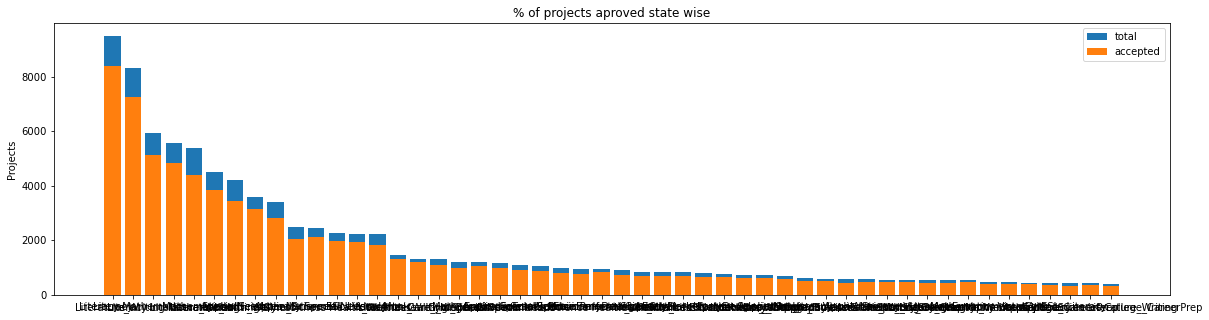

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [54]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [60]:
univariate_analys(project_data, 'clean_subcategories', 'project_is_approved',top=50)

                         clean_subcategories  project_is_approved  total  \
317                                 Literacy                 8371   9486   
319                     Literacy Mathematics                 7260   8325   
331           Literature_Writing Mathematics                 5140   5923   
318              Literacy Literature_Writing                 4823   5571   
342                              Mathematics                 4385   5379   
330                       Literature_Writing                 3846   4501   
392                             SpecialNeeds                 3431   4226   
289                          Health_Wellness                 3131   3583   
18               AppliedSciences Mathematics                 2824   3399   
326                    Literacy SpecialNeeds                 2111   2440   
0                            AppliedSciences                 2038   2492   
258              Gym_Fitness Health_Wellness                 1978   2264   
138         

In [61]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
my_counter

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)
df_cat=pd.DataFrame(sorted_cat_dict.items(),columns=['project_category','Count'])
px.bar(df_cat,x='project_category',y='Count')


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


In [63]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

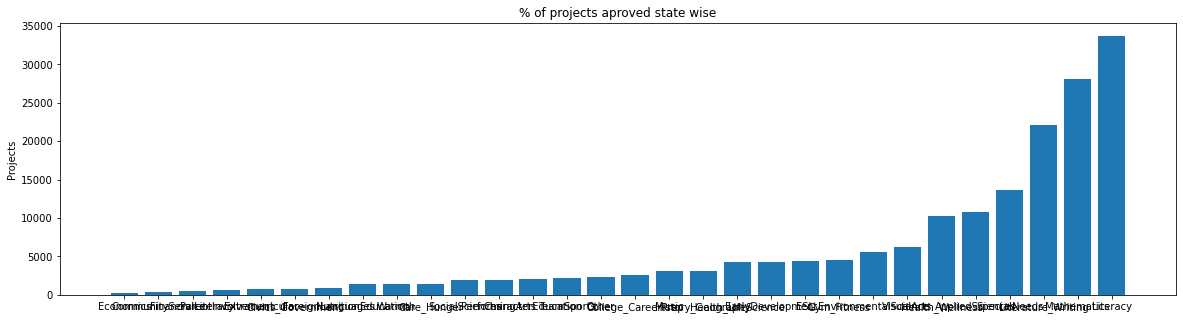

In [64]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [65]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

In [73]:
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
sorted_word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
print(sorted_word_dict)
df_cat=pd.DataFrame(sorted_word_dict.items(),columns=['project_title_len','Count'])
px.bar(df_cat,x='project_title_len',y='Count')

{13: 1, 12: 11, 11: 30, 1: 31, 10: 3968, 9: 5383, 8: 7289, 2: 8733, 7: 10631, 6: 14824, 3: 18691, 5: 19677, 4: 19979}


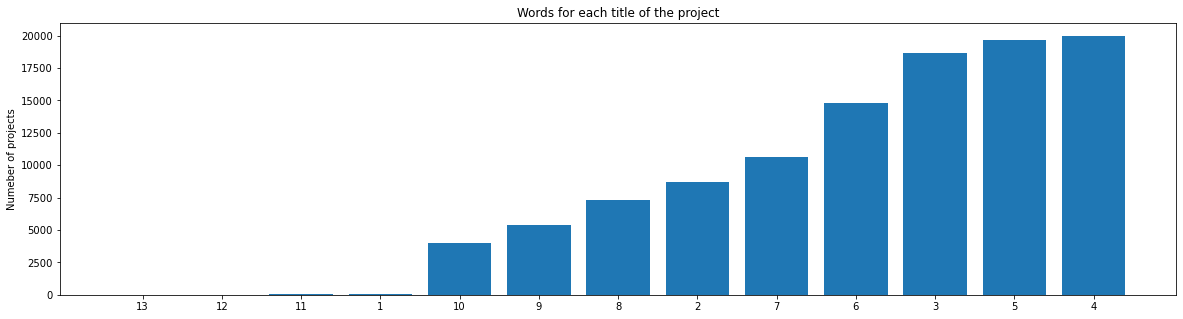

In [74]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [75]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

In [ ]:
px.box([approved_word_count,rejected_word_count])

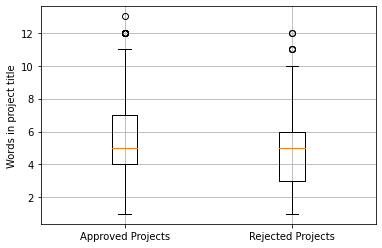

In [76]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

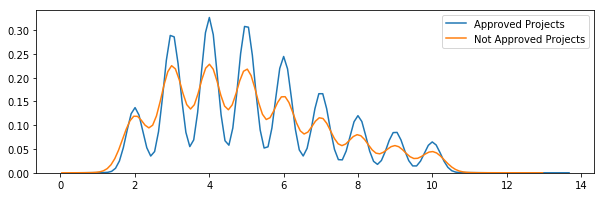

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

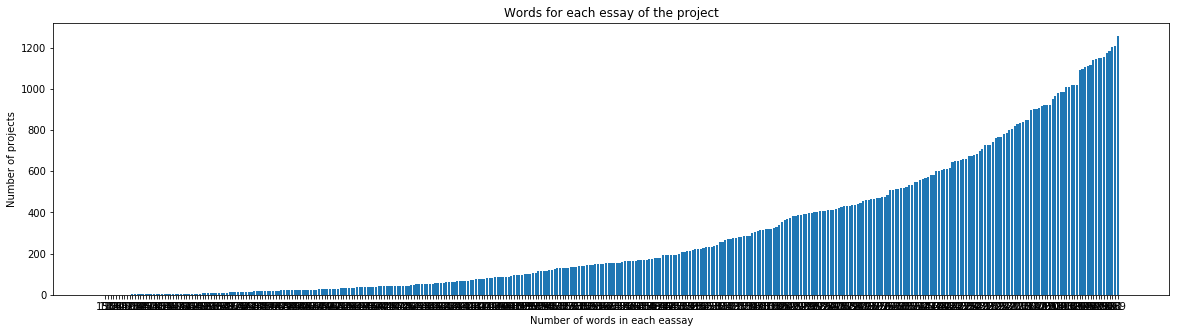

In [0]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

D:\installed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



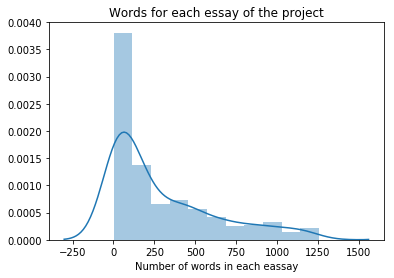

In [0]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [0]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

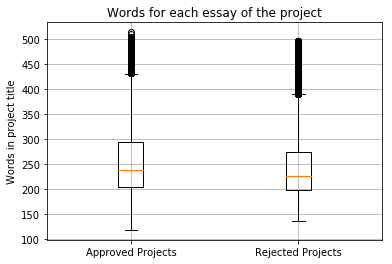

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

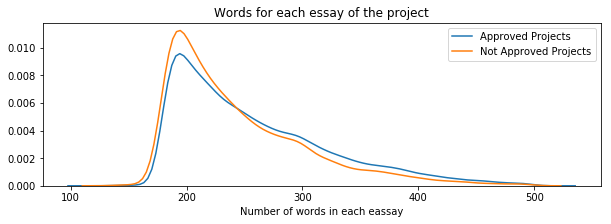

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [0]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

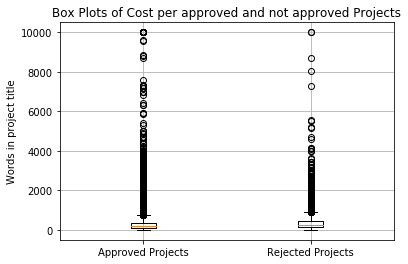

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

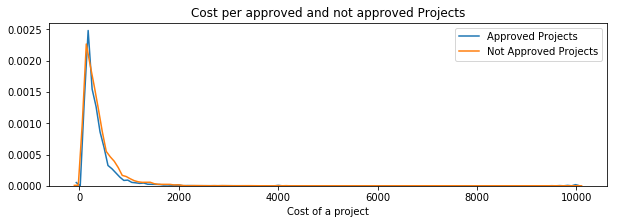

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [0]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this by yourself

observe the data analysis that was done in the above cells

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this by yourself

check the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project

if you feel like it will helpfull in the classification, please include in the further process or you can ignore it.